<a href="https://colab.research.google.com/github/duc-ke/study-book-keras_with_blocks/blob/master/6_RNN_music_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 변환 dictionary 생성
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [0]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [0]:
import numpy as np

In [0]:
def seq2dataset(seq, window_size):
  dataset = []
  for i in range(len(seq) - window_size):
    subset = seq[i:(i+window_size+1)]
    dataset.append([code2idx[each] for each in subset])
  return np.array(dataset)

In [5]:
seq2dataset(seq, 4)

array([[11,  9,  2, 10,  8],
       [ 9,  2, 10,  8,  1],
       [ 2, 10,  8,  1,  7],
       [10,  8,  1,  7,  8],
       [ 8,  1,  7,  8,  9],
       [ 1,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 11],
       [ 9, 10, 11, 11,  4],
       [10, 11, 11,  4, 11],
       [11, 11,  4, 11,  9],
       [11,  4, 11,  9,  9],
       [ 4, 11,  9,  9,  9],
       [11,  9,  9,  9, 10],
       [ 9,  9,  9, 10,  8],
       [ 9,  9, 10,  8,  1],
       [ 9, 10,  8,  1,  7],
       [10,  8,  1,  7,  9],
       [ 8,  1,  7,  9, 11],
       [ 1,  7,  9, 11, 11],
       [ 7,  9, 11, 11,  9],
       [ 9, 11, 11,  9,  9],
       [11, 11,  9,  9,  2],
       [11,  9,  9,  2,  8],
       [ 9,  9,  2,  8,  8],
       [ 9,  2,  8,  8,  8],
       [ 2,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  9],
       [ 8,  8,  8,  9,  3],
       [ 8,  8,  9,  3,  9],
       [ 8,  9,  3,  9,  9],
       [ 9,  3,  9,  9,  9],
       [ 3,  9,  9,  9,  9],
       [ 9,  9

In [6]:
train = seq2dataset(seq, 4)
train

array([[11,  9,  2, 10,  8],
       [ 9,  2, 10,  8,  1],
       [ 2, 10,  8,  1,  7],
       [10,  8,  1,  7,  8],
       [ 8,  1,  7,  8,  9],
       [ 1,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 11],
       [ 9, 10, 11, 11,  4],
       [10, 11, 11,  4, 11],
       [11, 11,  4, 11,  9],
       [11,  4, 11,  9,  9],
       [ 4, 11,  9,  9,  9],
       [11,  9,  9,  9, 10],
       [ 9,  9,  9, 10,  8],
       [ 9,  9, 10,  8,  1],
       [ 9, 10,  8,  1,  7],
       [10,  8,  1,  7,  9],
       [ 8,  1,  7,  9, 11],
       [ 1,  7,  9, 11, 11],
       [ 7,  9, 11, 11,  9],
       [ 9, 11, 11,  9,  9],
       [11, 11,  9,  9,  2],
       [11,  9,  9,  2,  8],
       [ 9,  9,  2,  8,  8],
       [ 9,  2,  8,  8,  8],
       [ 2,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  9],
       [ 8,  8,  8,  9,  3],
       [ 8,  8,  9,  3,  9],
       [ 8,  9,  3,  9,  9],
       [ 9,  3,  9,  9,  9],
       [ 3,  9,  9,  9,  9],
       [ 9,  9

In [0]:
x_train = train[:,0:4]
y_train = train[:,4]

#### 데이터 정규화

In [8]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
x_train = x_train / 13.0
y_train = np_utils.to_categorical(y_train)
x_train.shape, y_train.shape

((50, 4), (50, 12))

In [10]:
y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

#### 모델링

In [0]:
class DNN(Sequential):
  def __init__(self):
    super().__init__()
    self.add(Dense(128, activation='relu', input_shape=(4, )))
    self.add(Dense(128, activation='relu'))
    self.add(Dense(12, activation='softmax'))

    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model = DNN()
history = model.fit(x_train, y_train, epochs=2000, batch_size=10)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2000





50/50 [==============================] - 9s 185ms/step - loss: 2.4674 - acc: 0.1400
Epoch 2/2000
50/50 [==============================] - 0s 365us/step - loss: 2.3660 - acc: 0.3600
Epoch 3/2000
50/50 [==============================] - 0s 394us/step - loss: 2.2850 - acc: 0.3400
Epoch 4/2000
50/50 [==============================] - 0s 393us/step - loss: 2.2056 - acc: 0.3400
Epoch 5/2000
50/50 [==============================] - 0s 386us/step - loss: 2.1303 - acc: 0.3400
Epoch 6/2000
50/50 [==============================] - 0s 362us/step - loss: 2.0607 - acc: 0.3400
Epoch 7/2000
50/50 [==============================] - 0s 370us/step - loss: 2.0004 - acc: 0.3400
Epoch 8/2000
50/50 [==============================] - 0s 364us/step - loss: 1.9772 - acc: 0.3400
Epoch 9/2000
50/50 [==============================] - 0s 355us/step - loss: 1.9311 - acc: 0.3400
Epoch 10/2000
50/50 

In [13]:
!git clone https://github.com/duc-ke/study-book-keras_with_blocks.git
%run study-book-keras_with_blocks/0_custom_libraries.ipynb

Cloning into 'study-book-keras_with_blocks'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 187 (delta 78), reused 151 (delta 61), pack-reused 0
Receiving objects: 100% (187/187), 353.92 KiB | 3.89 MiB/s, done.
Resolving deltas: 100% (78/78), done.


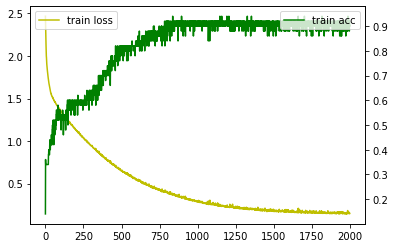

In [14]:
plot_accloss_trainonly(history)

In [15]:
evaluation = model.evaluate(x_train, y_train, batch_size=10)
evaluation

50/50 [==============================] - 0s 673us/step


[0.1404878728091717, 0.9199999809265137]

#### 모델 사용

#### 한 스텝 예측

In [0]:
import numpy as np

In [17]:
result_code_list = ['g8', 'e8', 'e4', 'f8']
pred = model.predict(x_train)
class_out = np.argmax(pred, axis=1)
result_code2 = [ idx2code[each] for each in class_out ]
result_code_list.extend(result_code2)
print(result_code_list)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### 곡 전체 예측

In [0]:
input_code_list = ['g8', 'e8', 'e4', 'f8']
result_code_list2 = input_code_list.copy()

for i in range(train.shape[0]):
  input_code = [code2idx[each] / 13.0 for each in input_code_list]
  input_code = np.array(input_code).reshape(1, -1)
  pred = model.predict(input_code)
  pred = np.argmax(pred)
  input_code_list.append(idx2code[pred])
  result_code_list2.append(idx2code[pred])
  input_code_list.pop(0)


In [19]:
result_code_list2

['g8',
 'e8',
 'e4',
 'f8',
 'd8',
 'd4',
 'c8',
 'e8',
 'g8',
 'g8',
 'e8',
 'e8',
 'e4',
 'd8',
 'd8',
 'd8',
 'd8',
 'e8',
 'f4',
 'e8',
 'e8',
 'e8',
 'e8',
 'f8',
 'g4',
 'g8',
 'e8',
 'e4',
 'f8',
 'd8',
 'd4',
 'c8',
 'e8',
 'g8',
 'g8',
 'e8',
 'e8',
 'e4',
 'd8',
 'd8',
 'd8',
 'd8',
 'e8',
 'f4',
 'e8',
 'e8',
 'e8',
 'e8',
 'f8',
 'g4',
 'g8',
 'e8',
 'e4',
 'f8']

In [0]:
def show_match_ratio(true_seq, pred_seq):
  if len(true_seq) != len(pred_seq):
    raise "Error! 두 시퀀스 길이가 맞지 않습니다."
  total_n = len(true_seq)
  match_n = 0
  for true, pred in zip(true_seq, pred_seq):
    if true == pred:
      match_n += 1
  match_ratio = match_n / total_n * 100
  print('{:.2f}% match!'.format(match_ratio))

In [21]:
show_match_ratio(seq, result_code_list)

92.59% match!


In [22]:
show_match_ratio(seq, result_code_list2)

27.78% match!
